<a href="https://colab.research.google.com/github/dbatu00/python-homeworks/blob/main/Dbatu_Airbnb_NYC_Final_Report_ID_104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deniz Batu 26386 Progress Report ID:104

  This project aims to find the most favorable location for maximum profit in the account of the host, near date specific events which take place anually in the same location in New York City.

  Memorial Day which takes place in Bay Ridge was chosen as the event. A comparison of near-event activity and annual activty was made for Bay Ridge and surrounding neighhbourhoods. 
  
  The first dataset used is 'AB_NYC_2019.csv' which contains all New York City Airbnb listings with their various details. The details needed for this project are price, count and location of individual listings.
  Bay Ridge and surrounding neighbourhoods(Sunset Park, Borough Park, Bersonhurt) are taken into consideration. From the dataset, total revenue, total listings and average price of each neighbourhood is calculated.
  The second dataset used is 'SP BP BR BH 051820 060220 daily occ.csv' which is taken from https://analytics.alltherooms.com/. It consists of daily rate and occupancy rates of the given neighbourhoods one week before and one week after the chosen event as well as yearly rate and occupancy averages .From that dataset two plot graphs were made to observe the behaviour of the two parameters near event. 

  The observations are based around two parameters: Daily rate changes and occupancy rate changes. Daily rate changes represent the hosts' opinion of what the right price is which is related to the expected activity and occupancy rates represent Airbnb guest preferance. The highest priced neighbourhood, Bay Ridge, which is closest to the event has the smallest change in occupancy and daily rates. The lowest priced neighbourhood, Borough Park, has the highest increase in occupancy rates but daily rates change minimally. This indicates that people that use Airbnb to attend an event tend to choose the lower priced location even if its more far. Also, since the pricing of the Borough Park changes minimally near the event, it is arguable the hosts do not anticipate the increased activity near the event date.
  Yearly popularity and total revenue of locations did not signify any relation to near event statistics. However, its arguable that yearly popularity of a location influences the preference of the customer less than prices.

  In conclusion, it is observed that customers value lower prices over closer locations for the events they want to attend to and most hosts are unaware of this fact.

  In the beginning of this project, aim was to find the optimal distance to an event for hosting an Airbnb for maximum profit. Arrival time and pricing were gonna be taken into consideration. However, available data about listing dates of Airbnb in NYC is very limited. In fact I had to use the only location specific event that has date data. I have contacted several Airbnb dataset contributors for accessing date information of all NYC Airbnb listings. If I can acquire the date data, I am planning to expand the project with more events to find numeral conclusions in the means of the optimal Airbnb ownership location. 



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns


NYC = pd.read_csv('AB_NYC_2019.csv') #getting data ready

NYC.drop(['availability_365', 'minimum_nights','id','host_name','last_review','name', 'host_id', 'latitude','room_type', 'longitude', 'number_of_reviews', 'reviews_per_month'], axis=1, inplace=True)

rates = pd.read_csv('SP BP BR BH 051820 060220 daily occ.csv') 

brooklyn = NYC.loc[NYC['neighbourhood_group'] == 'Brooklyn'] #getting neighbourhood list for brooklyn

# I attampted to use a function for simplicity but it didnt work and i couldnt find why
#def  ngbhr_data_func(nghbr):
#  nghbr_frame = brooklyn.loc[brooklyn['neighbourhood'] == nghbr]

#  nghbr_t_revenue = 0
#  nghbr_t_listing = 0
#  nghbr_avg_price = 0

#  for index, row in nghbr_frame.iterrows():
#   nghbr_t_revenue = nghbr_t_revenue + ((row['price']) * (row['calculated_host_listings_count']))
#    nghbr_t_listing =  nghbr_t_listing + (row['calculated_host_listings_count'])

#  nghbr_avg_price = nghbr_t_revenue/(nghbr_frame.calculated_host_listings_count.sum())  
  
#  return ngbhr_t_revenue, ngbhr_t_listing, ngbhr_avg_price


#dykerheights   = ngbhr_data_func('Dyker Heights')
#greenwood      = ngbhr_data_func('Greenwood Heights')
#forthamilton   = ngbhr_data_func('Fort Hamilton')
#nghbr = 'Sunset Park'
#sunsetpark     = ngbhr_data_func('Sunset Park')
#nghbr  ='Borough Park'
#boroughpark    = ngbhr_data_func('Borough Park')
#nghbr = 'Bensonhurst'
#bensonhurst    = ngbhr_data_func('Bensonhurst')
#nghbr  = 'Bay Ridge'
#bayridge       = ngbhr_data_func('Bay Ridge')


#print (ngbhr_data_func('Sunset Park'), ngbhr_data_func('Borough Park'))

#bar_avg_price = [sunsetpark[2],boroughpark[2],bensonhurst[2],bayridge[2]]





In [ ]:
rates

,Neighbourhood,Daily Rate Avg,Daily Rate High,Daily Rate Low,Occupation Rate Avg,Occupation Rate High,Occupation Rate Low
0,Sunset Park,63,86,75,43,62,59
1,Borough Park,58,58,58,27,38,32
2,Bersonhurst,63,77,71,38,53,50
3,Bay Ridge,110,110,110,60,64,61


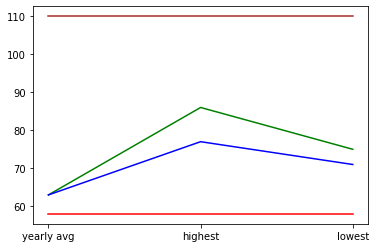

In [ ]:
# I chose not to write code for this since it is a small dataframe
sunsetdaily= [63 ,86,75]
boroughdaily=[58,58,58]
bersondaily =[63,77,71]
baydaily = [110,110,110]
avgs = ['yearly avg','highest','lowest']

plt.plot(avgs, sunsetdaily, color='green')
plt.plot(avgs, boroughdaily, color = 'red')
plt.plot(avgs, bersondaily, color = 'blue')
plt.plot(avgs, baydaily, color = 'brown')

plt.show()




#(y line is dollars.)


Daily rate changes(fee) in top and bottom popularity places are miniscule while the other two middle ground regions are affected greatly. Interpretation of this results is that host owners do not expect a change in the Airbnb activity near date times so they do not increase the prices. (y line is in dollars.)

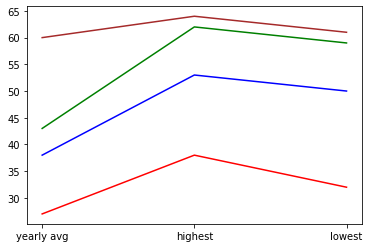

In [ ]:
sunsetocc = [43,62,59]
boroughocc =[27,38,32]
bersonocc = [38,53,50]
bayocc = [60,64,61]


plt.plot(avgs, sunsetocc, color='green')
plt.plot(avgs, boroughocc, color = 'red')
plt.plot(avgs, bersonocc, color = 'blue')
plt.plot(avgs, bayocc, color = 'brown')

plt.show()

#(y line is %.)

Unlike the daily rates, occupancy increases greatly near the event as observable by the peaks. While daily rates are subject hosts' opinion, occupancy rates indicate customer activity. The increased activity in all regions show that there is increased demand for airbnb in the event's location and surrounding locations. It is observable that Bay Ridge(shown in brown line) has less increase in comparison to other regions which shows that people who are using AirBnbs to attend to events like to go for surrounding areas as well. 

In [ ]:
# I ve tried to functionize this part but the values for all neighbourhoods were the same for a reason that I could not figure.

bay_ridge = brooklyn.loc[brooklyn['neighbourhood'] == 'Bay Ridge']

br_t_revenue = 0
br_t_listing = 0
br_avg_price = 0


for index, row in bay_ridge.iterrows():
     br_t_revenue = br_t_revenue + ((row['price']) * (row['calculated_host_listings_count']))
     br_t_listing =  br_t_listing + (row['calculated_host_listings_count'])

br_avg_price = br_t_revenue/(bay_ridge.calculated_host_listings_count.sum())

In [ ]:
borough_park = brooklyn.loc[brooklyn['neighbourhood'] == 'Borough Park']


bp_t_revenue = 0
bp_t_listing = 0
bp_avg_price = 0


for index, row in borough_park.iterrows():
     bp_t_revenue = bp_t_revenue + ((row['price']) * (row['calculated_host_listings_count']))
     bp_t_listing =  bp_t_listing + (row['calculated_host_listings_count'])

bp_avg_price = bp_t_revenue/(borough_park.calculated_host_listings_count.sum())

In [ ]:
bensonhurst = brooklyn.loc[brooklyn['neighbourhood'] == 'Bensonhurst']


bens_t_revenue = 0
bens_t_listing = 0
bens_avg_price = 0


for index, row in bensonhurst.iterrows():
     bens_t_revenue = bens_t_revenue + ((row['price']) * (row['calculated_host_listings_count']))
     bens_t_listing =  bens_t_listing + (row['calculated_host_listings_count'])

bens_avg_price = bens_t_revenue/(bensonhurst.calculated_host_listings_count.sum())

In [ ]:
sunset_park = brooklyn.loc[brooklyn['neighbourhood'] == 'Sunset Park']


sp_t_revenue = 0
sp_t_listing = 0
sp_avg_price = 0


for index, row in sunset_park.iterrows():
     sp_t_revenue = sp_t_revenue + ((row['price']) * (row['calculated_host_listings_count']))
     sp_t_listing =  sp_t_listing + (row['calculated_host_listings_count'])

sp_avg_price = sp_t_revenue/(sunset_park.calculated_host_listings_count.sum())

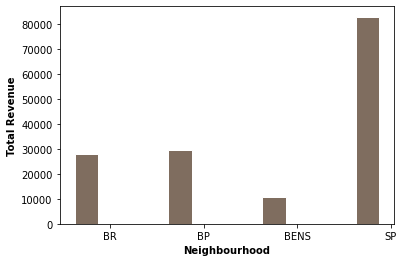

In [ ]:
barWidth = 0.25

bar_revenue = [br_t_revenue,bp_t_revenue, bens_t_revenue, sp_t_revenue]

# Set position of bar on X axis
r1 = np.arange(len(bar_revenue))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

 
# Make the plot
plt.bar(r1, bar_revenue, color='#7f6d5f', width=barWidth, edgecolor='white', label='Total Revenue')
plt.ylabel('Total Revenue', fontweight = 'bold')
plt.xlabel('Neighbourhood', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar_revenue))], ['BR', 'BP', 'BENS', 'SP'])

 

plt.show()

Total revenue ranking did not show any relevance to event statistics.

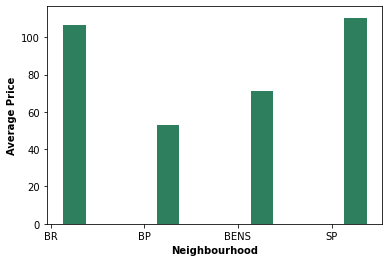

In [ ]:

bar_avg_price = [br_avg_price,bp_avg_price, bens_avg_price,sp_avg_price]

plt.bar(r3, bar_avg_price, color='#2d7f5e', width=barWidth, edgecolor='white', label='Average Price')
plt.ylabel('Average Price', fontweight='bold')
plt.xlabel('Neighbourhood', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar_avg_price))], ['BR', 'BP', 'BENS', 'SP'])

plt.show()


The prices are lower for  Borough Park and Bersonhurt and near event dates their popularity increases more than Bay Ridge which indicates that customers also consider listing for cheaper locations for the events they desire to attend even if its not directly in the neighbourhood that the event takes place.

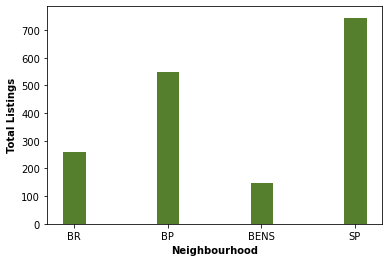

In [ ]:
barWidth = 0.25

bar_listing = [br_t_listing, bp_t_listing, bens_t_listing, sp_t_listing,]


plt.bar(r2, bar_listing, color='#557f2d', width=barWidth, edgecolor='white', label='Total Listings')
plt.ylabel('Total Listings', fontweight='bold')
plt.xlabel('Neighbourhood', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar_revenue))], ['BR',  'BP', 'BENS', 'SP',])
 


plt.show()

Since there is no correlation between the rankings of total listings and increase in popularity during event, its arguable that customers that will list for Airbnb's for attending events cares more about the price of the location rather than the yearly popularity.